In [26]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

# Phasor

##### if confused, refer to the explanation in Day2 pdf

In [27]:
# parameter setting
amp = 1         # range [0.0, 1.0]
sr = 10000      # sampling rate, Hz (how many in 1 sec can be Hz)
dur = 2        # in seconds
freq = 100     # sine frequency, Hz (related to the intensity of sound)
# need to differentiate Sr and freq

In [28]:
# generate time
t = np.arange(1, sr * dur+1)/sr
t
len(t)

20000

In [29]:
# generate phase
theta = t * 2*np.pi * freq   
print(theta)
len(theta)
# understand this logically

[6.28318531e-02 1.25663706e-01 1.88495559e-01 ... 1.25651140e+03
 1.25657423e+03 1.25663706e+03]


20000

In [67]:
# generate signal by cosine-phasor
s = amp*np.sin(theta) # radiant
len(s)

20000

<IPython.core.display.Javascript object>


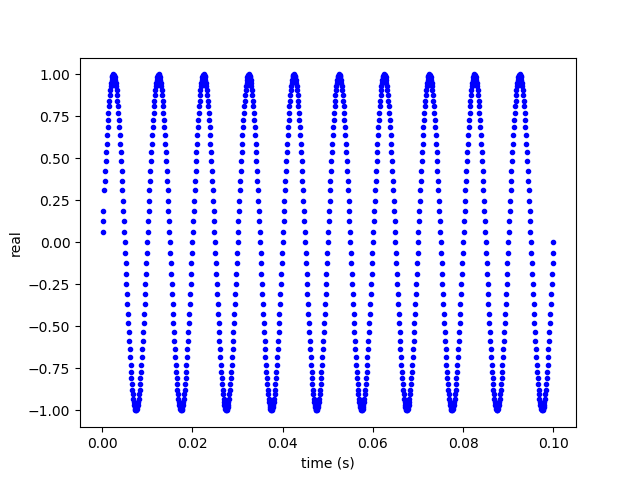

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:3], s[0:3], '.', color='blue') 
ax.plot(t[4:1000], s[4:1000], '.', color='blue') 
#ax.plot(t[0:1000], s[0:1000], '.')
# if sr diff, dots same amount but time diffs
# simply put, it's extracting||accessing 1000 samples in timeline
# thus, it's just obvious that even if sr diffs, same dots are in lot
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ipd.Audio(s, rate=sr)

# 5th dot == t[4], s[4]
# vector length should be... obviously matching

##### if confused, refer to the explanation in TransferFunction pdf

In [8]:
# generate signal by complex-phasor
c = np.exp(theta*1j) 
# e^(pi*i)
# exponential

# pi = 0.001... 2pi
# t = 0.001,0.002...1

<IPython.core.display.Javascript object>


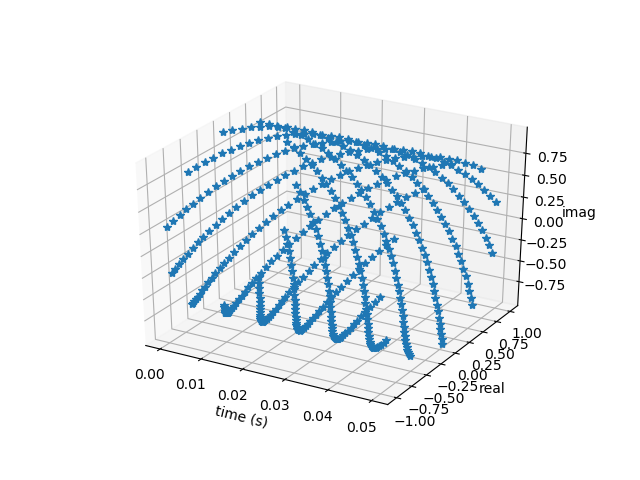

Text(0.5, 0, 'imag')

In [125]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:500], c.real[0:500], c.imag[0:500], '*')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [101]:
ipd.Audio(s, rate=sr)

Signal == time series == temporal trajectory

# Generate pulse train

<IPython.core.display.Javascript object>


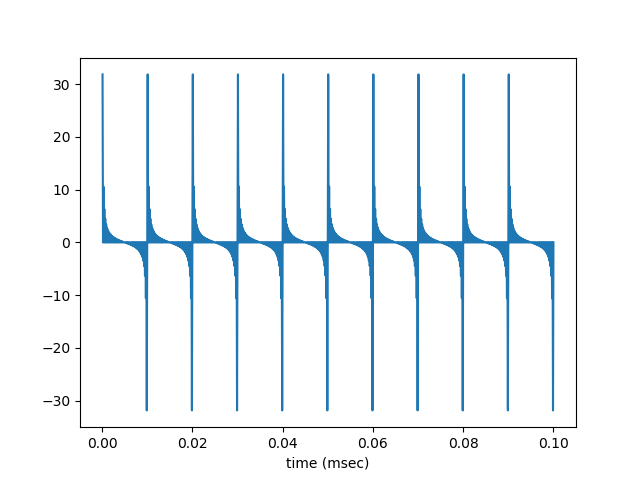

5000

In [128]:
# generate samples, note conversion to float32 array
# all sounds = combination of sine waves
# respective sine waves may vary from amp & freq
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
# from 100 to Fend+1(==5000 for range fnc) == 50 loops // when sr == 10000
# just Fend+1 would be 5001 but since it's range it's 5000
# from 100 to Fend == 49 loops
for freq in range(F0, Fend+1, F0): 
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta) # what if this comes to be cos?
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

Fend

In [107]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [127]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)